In [78]:
import pandas as pd
BRO_full = pd.read_csv("BRO.csv", sep=",", parse_dates=['Date'])
BRO_full.info()
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime

BRO_full['D'] = BRO_full['Date'.replace('-',' ')]






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            298 non-null    datetime64[ns]
 1   Low             298 non-null    float64       
 2   Open            298 non-null    float64       
 3   Volume          298 non-null    int64         
 4   High            298 non-null    float64       
 5   Close           298 non-null    float64       
 6   Adjusted Close  298 non-null    float64       
 7   Unnamed: 7      0 non-null      float64       
 8   Unnamed: 8      0 non-null      float64       
 9   Unnamed: 9      0 non-null      float64       
 10  Unnamed: 10     0 non-null      float64       
 11  Unnamed: 11     0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 28.1 KB


In [79]:
print(BRO_full.head(n=10))

        Date     Low   Open   Volume    High  Close  Adjusted Close  \
0 2020-01-02  13.560  13.98  1056200  13.980  13.65       12.649309   
1 2020-01-03  13.525  13.58  1885900  13.820  13.78       12.769778   
2 2020-01-06  13.740  13.91  2537000  13.990  13.88       12.862448   
3 2020-01-07  13.650  13.84  1320100  13.880  13.72       12.714177   
4 2020-01-08  13.620  13.72  1365600  13.800  13.78       12.769778   
5 2020-01-09  13.680  13.78  2097000  13.840  13.78       12.769778   
6 2020-01-10  13.730  13.82  1232300  13.920  13.90       12.880979   
7 2020-02-03  14.070  14.09   909100  14.230  14.11       13.075584   
8 2020-02-04  14.085  14.17  1132200  14.275  14.25       13.205322   
9 2020-02-05  14.270  14.28  1068200  14.420  14.29       13.242391   

   Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11          D  
0         NaN         NaN         NaN          NaN          NaN 2020-01-02  
1         NaN         NaN         NaN          NaN          NaN 

<function matplotlib.pyplot.show(close=None, block=None)>

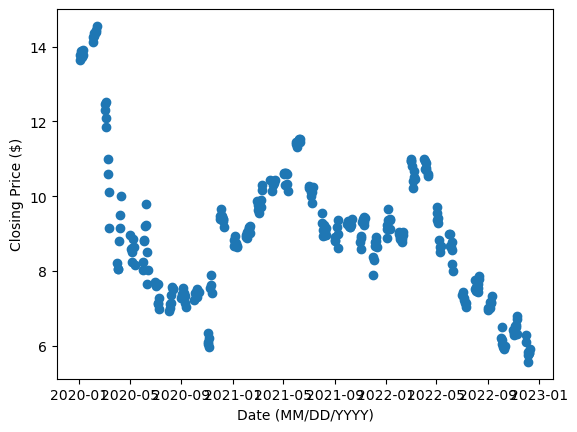

In [93]:
import matplotlib.pyplot as plt
date = BRO_full['Date']
close = BRO_full['Close']
plt.scatter(date, close)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('Closing Price ($)')
plt.show

In [81]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(BRO_full, 
                                        test_size=.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  238 Test size:  60


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Close']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Close']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  26.15406295163936
    Coefficients [-5.03490316e-91  0.00000000e+00 -3.98676807e-54]
    Score 0.20066872989594386
MAE is  1.3429311686531353
RMSE is  1.6842481193987728
MSE is  2.836691727698303
R^2   0.20066872989594386

Results for polynomial regression on test data
MAE is  1.3271907977502118
RMSE is  1.6987712134754418
MSE is  2.8858236357328253
R^2     0.047739027457221805


In [92]:



power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Close']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Close']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  17.84283855857816
    Coefficients [ 1.27878114e-17 -6.29344791e-36 -3.01944581e-54]
    Score 0.20069660991104477
MAE is  1.3426045630747037
RMSE is  1.6842187465503555
MSE is  2.836592786231651
R^2   0.20069660991104477

Results for elastic net on test data
MAE is  1.3267555238439366
RMSE is  1.698487430337132
MSE is  2.8848595510132338
R^2     0.04805715509375663


C:\Users\jstcl\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.376e+02, tolerance: 8.446e-02
  model = cd_fast.enet_coordinate_descent(


Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  26.15406295163936
    Coefficients [-5.03490316e-91  0.00000000e+00 -3.98676807e-54]
    Score 0.20066872989594386
MAE is  1.3429311686531353
RMSE is  1.6842481193987728
MSE is  2.836691727698303
R^2   0.20066872989594386

Results for polynomial regression on test data
MAE is  1.3271907977502118
RMSE is  1.6987712134754418
MSE is  2.8858236357328253
R^2     0.047739027457221805
